<a href="https://colab.research.google.com/github/fatihTalhaYavuz/Menus/blob/main/ML_Proje_Odevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd # Gerekli kutuphanelerin yuklenmesi. pandas, seaborn, numpy, pylot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

ins = pd.read_csv("insurance.csv") # Datasetin yuklenmesi ve kopyalanmasi.
df = ins.copy() # Veriler kaybolmasın diye kopyaladık
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.size

9366

In [ ]:
# Datasetin ozelliklerinin incelenmesi. Burada NaN değer olmadigi gözlemlendi.


df.info() # Dtypelari inceledik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:


df.isnull().sum() # Burada da NaN deger olmadığını doğruladık

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:


df.describe() # Bilimsel istatistiklerini inceledik

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:


df.columns #Datasetin sütunları.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'BMI')

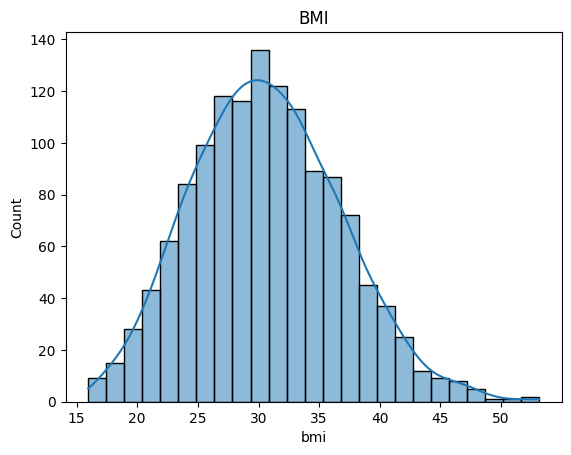

In [ ]:
# Bmi (Vücut Kitle İndeksi) dağılımını inceledik

sns.histplot(df["bmi"], kde= True)
plt.title("BMI")

Text(0.5, 1.0, 'Smoker - Charges')

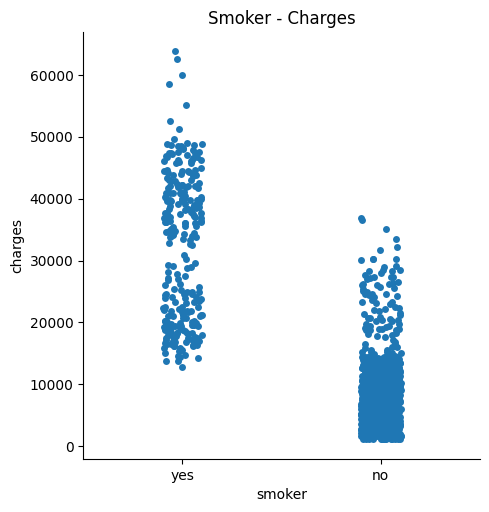

In [ ]:
# “Sigara içen(Smoker)” ile “suçlamalar(charges)” arasındaki ilişkiyi inceledik.

sns.catplot(x= "smoker", y= "charges", data= df)
plt.title("Smoker - Charges")

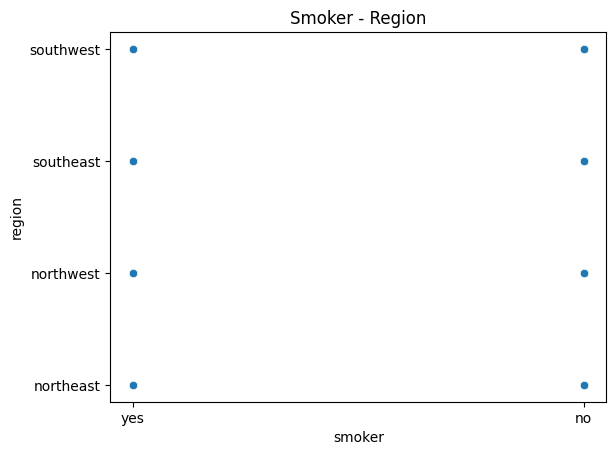

In [ ]:
# “Sigara içen” ile “bölge” arasındaki ilişkiyi inceledik.

sns.scatterplot(x= "smoker", y= "region", data=df)
plt.title("Smoker - Region")
plt.show()

Text(0.5, 1.0, 'Sex - Bmi')

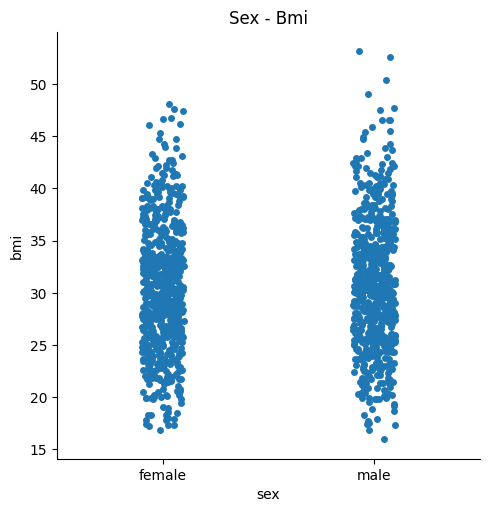

In [ ]:
# “BMI” ve “cinsiyet” arasındaki ilişkiyi inceledik.

sns.catplot(x= "sex", y= "bmi", data= df)
plt.title("Sex - Bmi")

<ipython-input-55-be80d6260885>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').sum().plot.pie(y= "children", figsize=(5,5), autopct="%.1f%%", legend= False)


<Axes: ylabel='children'>

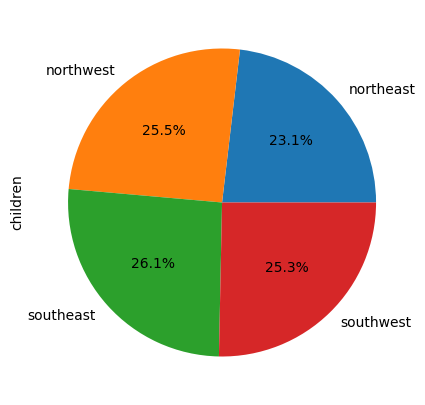

In [ ]:
# En çok çocuğun olduğu bölgeyi bulduk. "children". -->> Southeast.

df.groupby('region').sum().plot.pie(y= "children", figsize=(5,5), autopct="%.1f%%", legend= False)

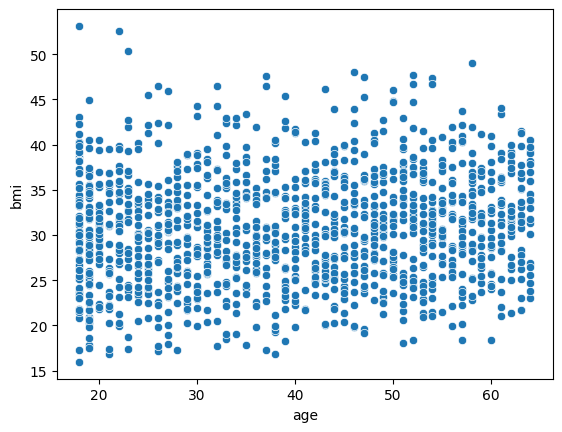

In [ ]:
# “Yaş” ve “BMI” arasındaki ilişkiyi inceledik.

sns.scatterplot(x= "age", y= "bmi", data=df)
plt.show()

Text(0.5, 1.0, 'Children - Bmi')

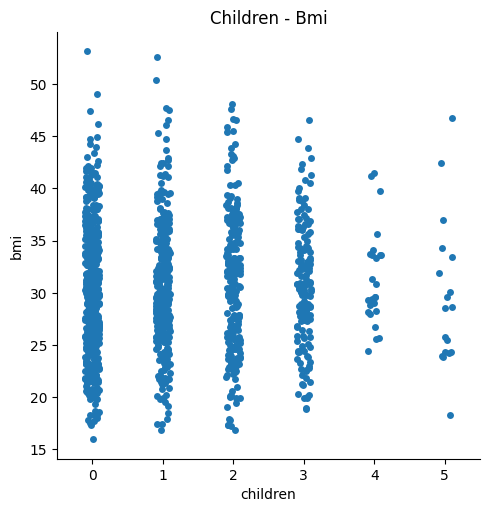

In [ ]:
# “BMI” ve “çocuklar” arasındaki ilişkiyi inceledik.

sns.catplot(x= "children", y= "bmi", data=df)
plt.title("Children - Bmi")

<Axes: xlabel='bmi'>

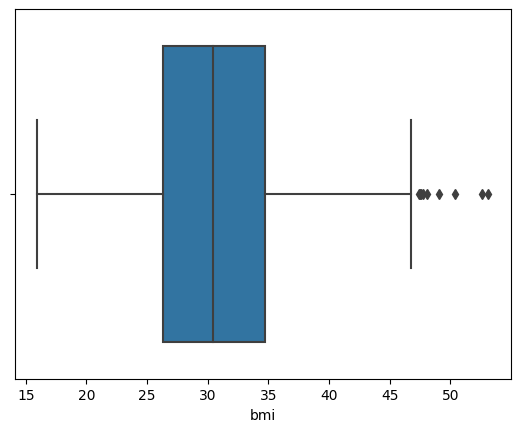

In [ ]:
# Birden fazla outlier olduğunu görüyoruz. İstersek bu outlierları bulabiliriz.

sns.boxplot(x= "bmi", data= df)

<Axes: xlabel='charges'>

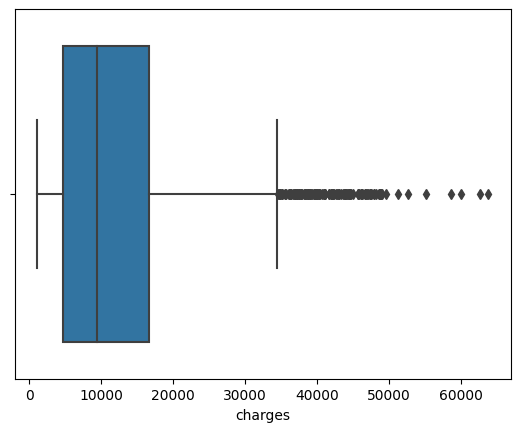

In [ ]:
sns.boxplot(x= "charges", data= df)

In [ ]:
# Bmi içerisindeki outlierlari bulmak icin IQR analizini uygulayacağız.
# 107 tane outlier tespit ettik.

q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)


IQR = q3 - q1

ust_limit = q3 + 1.5 * IQR
alt_limit = q3 - 1.5 * IQR

outliers_bmi = df[(df["bmi"] > ust_limit) | (df["bmi"] < alt_limit) ]

outliers_bmi

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
35,19,male,20.425,0,no,northwest,1625.43375
37,26,male,20.800,0,no,southwest,2302.30000
42,41,male,21.780,1,no,southeast,6272.47720
98,56,male,19.950,0,yes,northeast,22412.64850
...,...,...,...,...,...,...,...
1295,20,male,22.000,1,no,southwest,1964.78000
1302,25,female,20.800,1,no,southwest,3208.78700
1306,29,female,21.850,0,yes,northeast,16115.30450
1316,19,female,20.600,0,no,southwest,1731.67700


In [ ]:
# Charges içerisindeki outlierlari bulmak için IQR analizini uygulayacağız.
# 139 tane outlier tespit ettik.

q1 = df["charges"].quantile(0.25)
q3 = df["charges"].quantile(0.75)


IQR = q3 - q1

ust_limit = q3 + 1.5 * IQR
alt_limit = q3 - 1.5 * IQR

outliers_charges = df[(df["charges"] > ust_limit) | (df["charges"] < alt_limit) ]

outliers_charges

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


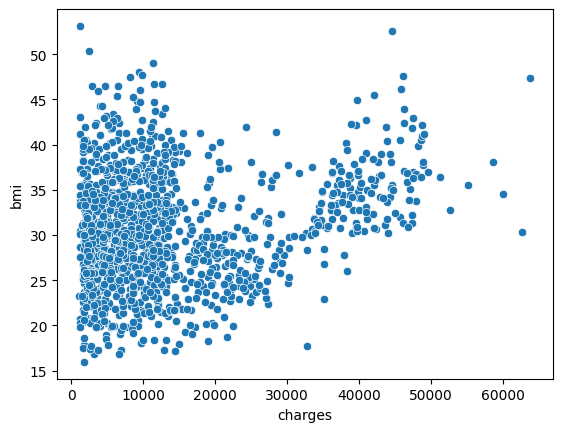

In [ ]:
# “BMI” ile “ücretler” arasındaki ilişkiyi inceledik

sns.scatterplot(x= "charges", y= "bmi", data=df)
plt.show()

Text(0.5, 1.0, 'Bmi - Region - Smoker')

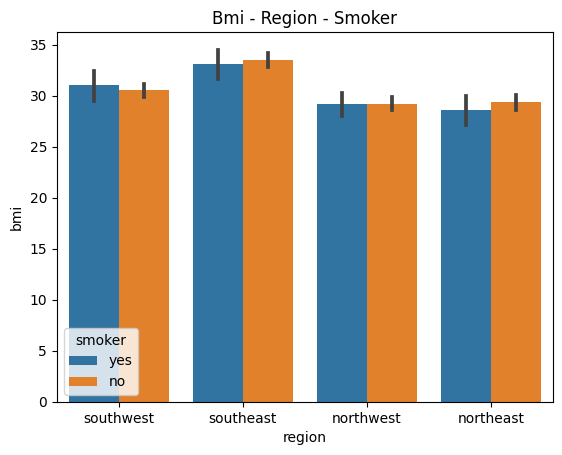

In [ ]:
# Çubuk grafiğini kullanarak “bölge”, “sigara içen” ve “bmi” arasındaki ilişkiyi inceledik.

sns.barplot(x="region",
            y="bmi",
            hue="smoker",
            data=df)
plt.title("Bmi - Region - Smoker")

Text(0.5, 1.0, 'Smoker - Bmi - Region')

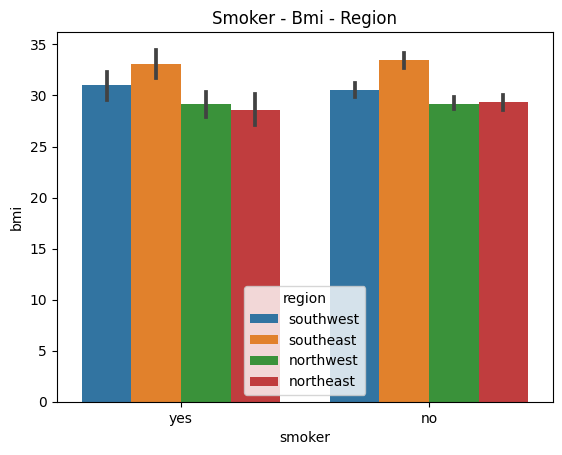

In [ ]:
# Çubuk grafiğini kullanarak “bölge”, “sigara içen” ve “bmi” arasındaki ilişkiyi inceledik.\\ 2.görünüş.


sns.barplot(x="smoker",
            y="bmi",
            hue="region",
            data=df)
plt.title("Smoker - Bmi - Region")

In [ ]:
# Encoding işlemi.

df["sex"] = df["sex"].replace(["female", "male"], [0, 1])
df["smoker"] = df["smoker"].replace(["no", "yes"], [0, 1])
df["region"] = df["region"].replace(["southeast", "southwest", "northwest", "northeast"], [0, 1, 2, 3])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
# Features and Target Columnmin belirlenmesi.

X = df.drop("charges", axis= 1)
y = df["charges"]

In [ ]:
# Train - Test - Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y,
                                   test_size= 0.2,
                                   random_state= 2)

In [ ]:
# Standart Ölçeklendirme ile normalleştirerek veri kümesini ölçeklendirdik

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# LinearRegression Modeli

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
# Regresyon için score metriklerinin import edilmesi.

from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y_test, predictions)

38228939.14400928

In [ ]:
mean_absolute_error(y_test, predictions)

4260.5020623660785

In [ ]:
r2_score(y_test, predictions)

0.7454471618659976

In [ ]:
# KNeighbors Modeli.

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred= knn_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

27025624.10613433

In [ ]:
mean_absolute_error(y_test, y_pred)

3072.303718722388

In [ ]:
r2_score(y_test, y_pred)

0.8200460312894332

In [ ]:
# DecisionTree Modeli.

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(criterion= "squared_error",
                                  splitter= "best",
                                  max_depth= 7,
                                  min_samples_split= 3,
                                  max_features= 5,
                                  random_state= 53)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=5, min_samples_split=3,
                      random_state=53)

In [ ]:
dt_model_y_pred = dt_model.predict(X_test)

In [ ]:
r2_score(y_test, dt_model_y_pred)

0.7888914286951293

In [ ]:
# RandomForest Modeli

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 200,
                                  criterion = "squared_error",
                                  min_samples_split= 5,
                                  max_features= "sqrt",
                                  bootstrap= True,
                                  max_samples= 0.6)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6, min_samples_split=5,
                      n_estimators=200)

In [ ]:
rf_model_y_pred = rf_model.predict(X_test)

In [ ]:
r2_score(y_test, rf_model_y_pred)

0.8458581107558283

In [ ]:
# XGBoost Modeli.

from xgboost import XGBRegressor

base_xgb = XGBRegressor()

In [ ]:
base_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_2 = base_xgb.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_2)

0.8112156745360154

In [ ]:
# LightGBM Modeli

from lightgbm import LGBMRegressor

base_lgb = LGBMRegressor()

In [ ]:
base_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13375.293496


LGBMRegressor()

In [ ]:
y_pred_base_lgb = base_lgb.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_base_lgb)

0.8411324741664459

In [ ]:
# XGBoost modelini ve LGBM modelini RandomSearch ve GridSearch ile
# tuned edip modelimizin sonuclarini tekrardan gozlemleyecegiz.

from sklearn.model_selection import RandomizedSearchCV

tuned_xgb = XGBRegressor()
param_dist = {
    "n_estimators" : np.arange(100, 2000, 100),
    "max_depth" : np.arange(2, 12, 1),
    "learning_rate" : np.arange(0.01, 1, 0.05),
    "subsample" : [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

random_model = RandomizedSearchCV(tuned_xgb, param_dist,
                                  n_iter= 30,
                                  cv= 5,
                                  scoring= "neg_mean_squared_error")

random_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_mean_squared_error')

In [ ]:
# En iyi paramlari secme.

random_model.best_params_

{'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}

In [ ]:
best_tuned_xgb = random_model.best_estimator_

In [ ]:
y_pred_tuned_xgb = best_tuned_xgb.predict(X_test)

In [ ]:
# Vanilla XGBoost 0.8266763227224659 r2 score verirken
# Tuned XGboost RandomSearch ile 0.8698306451788135

r2_score(y_test, y_pred_tuned_xgb)

0.8698306451788135

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_lgb = LGBMRegressor()

params = {
    "n_estimators" : [100, 300, 600, 1000],
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "subsample" : [0.5, 0.7, 1]
}


grid_model = GridSearchCV(tuned_lgb, params, scoring= "neg_mean_squared_error", cv= 3)


grid_model.fit(X_train, y_train)

In [ ]:
grid_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [ ]:
best_tuned_lgb = grid_model.best_estimator_

In [ ]:
# Vanilla LGBM ile 0.8411324741664459 skorunu elde etmistik.
# Tuned LGBM ve GridSearch ile 0.8743330054985141
# Skorunu elde ettik. RandomSearch ve GridSearch başari göstermiş
# oldu.

y_pred_tuned_lgb = best_tuned_lgb.predict(X_test)
r2_score(y_test, y_pred_tuned_lgb)

0.8743330054985141

In [ ]:
# GradientBoost Modeli.

from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators= 300,
                                      max_depth= 5,
                                      learning_rate= 0.01,
                                      min_samples_split= 3)

In [ ]:
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=300)

In [ ]:
y_pred_gbr_model = gbr_model.predict(X_test)
r2_score(y_test, y_pred_gbr_model)

0.849560300703992